 # Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Proposito del Proyecto 

# 1.1 Iniciacion

In [117]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
import sidetable as stb
from scipy.stats import norm

# 1.2 Carga de Datos

In [118]:
data_raw = pd.read_csv("logs_exp_us.csv", sep="\t")

#/datasets/

## 1.3 Preparar los datos

In [119]:
def info_gral(datos):
    print("------Primeras Filas------")
    print(datos.head())
    print()
    print("------Datos Generales------")
    print(datos.info())
    print()
    print("------Revision de Datos Ausentes------")
    print(datos.isna().sum())
    print()
    print("------Revision de Duplicados------")
    print(datos.duplicated().sum())
    print()
    print("------Valores Faltantes------")
    print(datos.stb.missing())

## 1.4 Limpieza de Datos

In [120]:
info_gral(data_raw)

------Primeras Filas------
                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248

------Datos Generales------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None

------Revision de Datos Ausentes------
EventName         0
DeviceIDHash      0
Eve

In [121]:
data_raw.columns = ['event', 'user', 'timestamp', 'exp_id']

In [122]:
data = data_raw.drop_duplicates()
print(data.duplicated().sum())


0


In [123]:
data.loc[:, 'datetime'] = pd.to_datetime(data['timestamp'], unit='s')

data['datetime']


/var/folders/lb/kp8wpfls0cl3fyn5r3qhm7zm0000gn/T/ipykernel_16251/2984457363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'datetime'] = pd.to_datetime(data['timestamp'], unit='s')


0        2019-07-25 04:43:36
1        2019-07-25 11:11:42
2        2019-07-25 11:28:47
3        2019-07-25 11:28:47
4        2019-07-25 11:48:42
                 ...        
244121   2019-08-07 21:12:25
244122   2019-08-07 21:13:59
244123   2019-08-07 21:14:43
244124   2019-08-07 21:14:58
244125   2019-08-07 21:15:17
Name: datetime, Length: 243713, dtype: datetime64[ns]

In [124]:
data.loc[:,'date']=data['datetime'].dt.floor('1D')
data['date']

/var/folders/lb/kp8wpfls0cl3fyn5r3qhm7zm0000gn/T/ipykernel_16251/2377806039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'date']=data['datetime'].dt.floor('1D')


0        2019-07-25
1        2019-07-25
2        2019-07-25
3        2019-07-25
4        2019-07-25
            ...    
244121   2019-08-07
244122   2019-08-07
244123   2019-08-07
244124   2019-08-07
244125   2019-08-07
Name: date, Length: 243713, dtype: datetime64[ns]

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente estructura en la carga y limpieza de datos. La función `info_gral()` es una buena práctica para revisar rápidamente la calidad de los datos. ¡Bien hecho!  
</div>

# Estudiar y comprobar los datos

In [125]:
list(data['event'].unique())

['MainScreenAppear',
 'PaymentScreenSuccessful',
 'CartScreenAppear',
 'OffersScreenAppear',
 'Tutorial']

### ¿Cuántos eventos hay en los registros?

In [126]:
print(len(data))


243713


Hay 243,713 eventos registrados

### ¿Cuántos usuarios hay en los registros?

In [127]:
print(data['user'].nunique())

7551


Hay 7551 usuarios unicos 

### ¿Cuál es el promedio de eventos por usuario?

In [128]:
len(data) / data['user'].nunique()

32.27559263673685

Hay un promedio de 32 eventos por cada usuario

¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?

<Axes: >

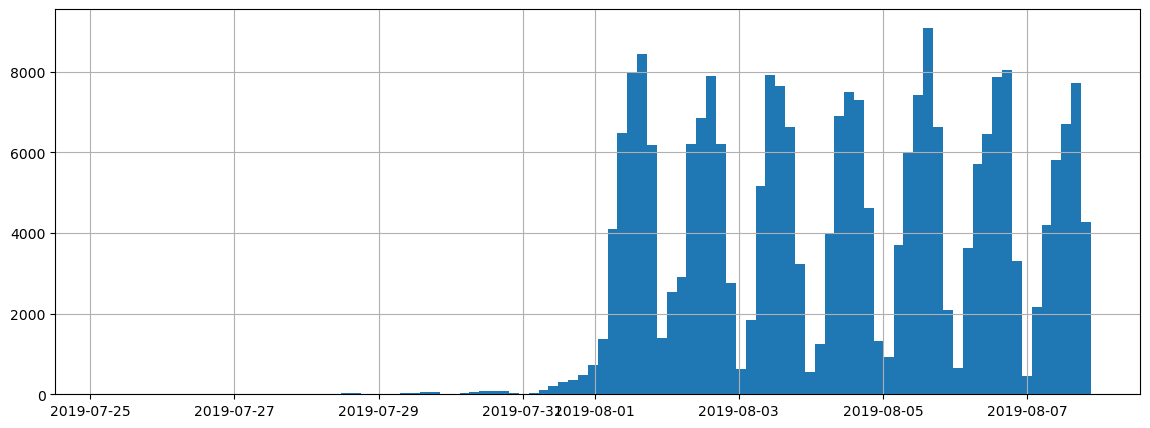

In [129]:
data['datetime'].hist(bins=100, figsize =(14,5))

<Axes: xlabel='date'>

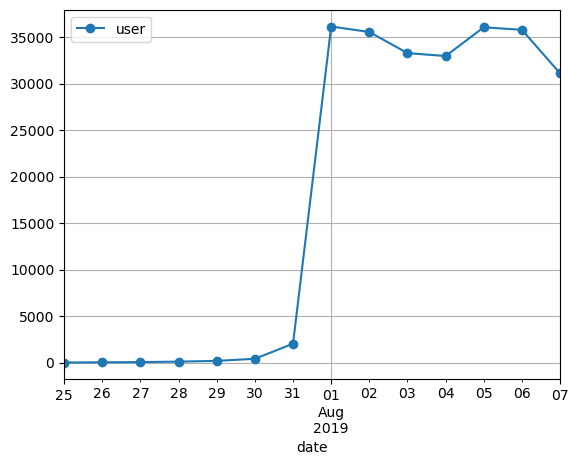

In [130]:
data.pivot_table(index='date', values='user', aggfunc ='count').plot(style= 'o-' , grid=True )

Aqui notamos que hubo un incremento en la muestra apartir del 01 de agosto 2019 

In [131]:
data_clean =data.query('datetime > "2019-08-01"').reset_index()

<Axes: xlabel='date'>

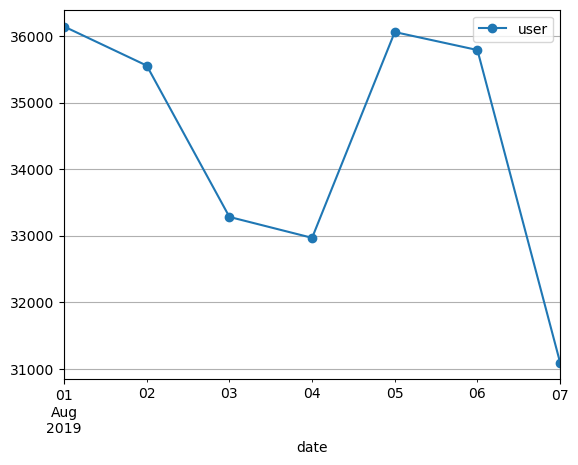

In [132]:
data_clean.pivot_table(index='date', values='user', aggfunc ='count').plot(style= 'o-' , grid=True )

<Axes: >

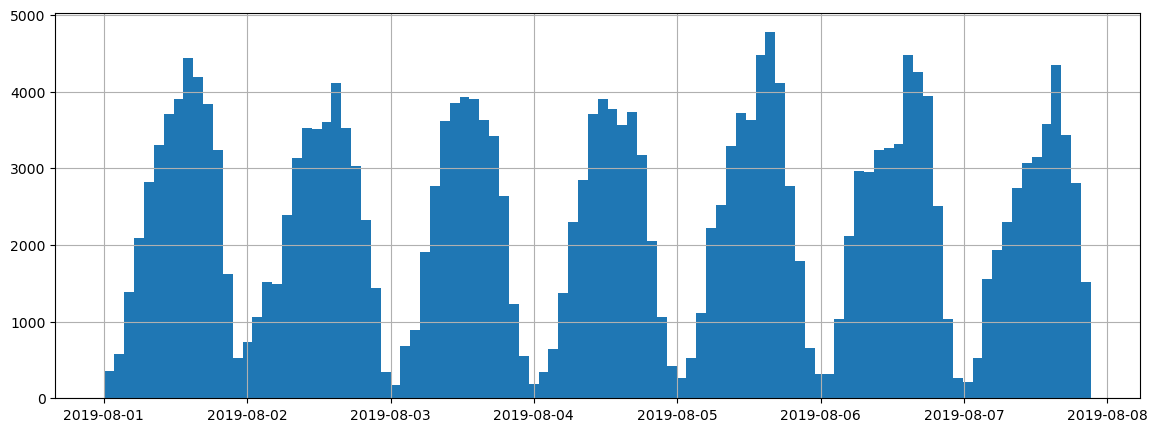

In [133]:
data_clean['datetime'].hist(bins=100, figsize =(14,5))

tomamos los datos donde se tiene mayor muestras que son 01/Agosto/2019

### ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

In [134]:
total_event_clean = len(data_clean)
total_event_clean

240887

Ya ocupando la muestra antes mencionada tenemos 240887 eventos

In [135]:
# Calcular la diferencia
eventos_perdidos = len (data) - total_event_clean

# Calcular el porcentaje de eventos perdidos
porcentaje_perdido = (eventos_perdidos / len (data)) * 100

print(f"Eventos perdidos: {eventos_perdidos}")
print(f"Porcentaje de eventos perdidos: {porcentaje_perdido:.2f}%")

Eventos perdidos: 2826
Porcentaje de eventos perdidos: 1.16%


In [136]:
users_clean =len(data_clean['user'].unique())
users_clean

7534

In [137]:
# Calcular la diferencia
clientes_perdidos = data['user'].nunique() - users_clean

# Calcular el porcentaje de eventos perdidos
porcentaje_perdido = (clientes_perdidos / data['user'].nunique()) * 100

print(f"Clientes perdidos: {clientes_perdidos}")
print(f"Porcentaje de clientes perdidos: {porcentaje_perdido:.2f}%")

Clientes perdidos: 17
Porcentaje de clientes perdidos: 0.23%


Ocupando la muestra mencionada tenemos 7534 usuarios unicos

In [138]:
eventos_per_user = total_event_clean/users_clean
eventos_per_user

31.97332094504911

Y el promedio ocupando esta muestra es de 31.9 eventos por resgistro esto es un aproximado.

In [139]:
# Calcular la diferencia
porcentaje_perdido = len(data) / data['user'].nunique() - eventos_per_user

print(f"Promedio de evento por usuario perdidos: {porcentaje_perdido:.2f}%")

Promedio de evento por usuario perdidos: 0.30%


Revisando los datos que tomamos de la fecha de 01/Agosto/2019 a terminar los registros no es un porcentaje tan grabante de los usuarios, eventos y promedio por evento ya que tenemos 1.16% de eventos perdidos 0.23 de clientes perdidos y el promedio de eventos por usuario no se ve muy afectado es solo 0.30%

### Asegúrate de tener usuarios de los tres grupos experimentales.

In [140]:
data['exp_id'].value_counts()

exp_id
248    85582
246    80181
247    77950
Name: count, dtype: int64

In [141]:
data.pivot_table(index='event', values='user', aggfunc ='count').sort_values('user', ascending=False)

,user
event,
MainScreenAppear,119101
OffersScreenAppear,46808
CartScreenAppear,42668
PaymentScreenSuccessful,34118
Tutorial,1018


In [142]:
users_per_event = data_clean.pivot_table(
    index='event', 
    values= 'user', 
    aggfunc='nunique'
    ).sort_values('user',ascending=False)
users_per_event


,user
event,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539
Tutorial,840


In [143]:
users_per_event / data_clean['user'].nunique()

,user
event,
MainScreenAppear,0.984736
OffersScreenAppear,0.609636
CartScreenAppear,0.495620
PaymentScreenSuccessful,0.469737
Tutorial,0.111495


In [144]:
users_funnel = users_per_event[:-1]
users_funnel

,user
event,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539


In [145]:
users_funnel = (users_funnel / users_funnel.shift())
users_funnel.fillna(1, inplace=True)
users_funnel

,user
event,
MainScreenAppear,1.000000
OffersScreenAppear,0.619086
CartScreenAppear,0.812976
PaymentScreenSuccessful,0.947777


In [146]:
users_per_event.loc['PaymentScreenSuccessful']/ users_per_event.loc['MainScreenAppear']
users_per_event

,user
event,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539
Tutorial,840


el 47.7% de las personas que entran a la tienda compran 

#### Total de usuarios por experimento

In [147]:
users_per_exp_group = data_clean.pivot_table(index='exp_id', values='user', aggfunc='nunique')['user']
users_per_exp_group

exp_id
246    2484
247    2513
248    2537
Name: user, dtype: int64

Cada uno de los experimentos tienen suficientes usuarios para cada experimento.

In [148]:
users_per_exp_group_per_event = data_clean.pivot_table(index='event', values='user', columns='exp_id' ,aggfunc='nunique').reset_index()
users_per_exp_group_per_event

exp_id,event,246,247,248
0,CartScreenAppear,1266,1238,1230
1,MainScreenAppear,2450,2476,2493
2,OffersScreenAppear,1542,1520,1531
3,PaymentScreenSuccessful,1200,1158,1181
4,Tutorial,278,283,279


Aqui en esta tabla mostramos que cuanto registros tenemos por experimento 

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Gran trabajo en la exploración de los datos. Has aplicado correctamente las técnicas de filtrado para asegurar que los datos sean representativos y has comprobado la distribución de usuarios por grupo experimental. ¡Sigue así!  
</div>

## Paso 4. Estudiar el embudo de eventos

#### Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

In [149]:
# Agrupar por el evento y contar su frecuencia
frecuencia_eventos = data_clean['event'].value_counts().reset_index()
frecuencia_eventos.columns = ['evento_nombre', 'frecuencia']

# Ordenar por frecuencia descendente
frecuencia_eventos = frecuencia_eventos.sort_values(by='frecuencia', ascending=False)

# Mostrar la tabla
print(frecuencia_eventos)

             evento_nombre  frecuencia
0         MainScreenAppear      117328
1       OffersScreenAppear       46333
2         CartScreenAppear       42303
3  PaymentScreenSuccessful       33918
4                 Tutorial        1005


#### Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez

In [150]:
# 1. Calcular la cantidad de usuarios únicos por acción
usuarios_por_evento = data_clean.groupby('event')['user'].nunique().reset_index()
usuarios_por_evento.columns = ['evento_nombre', 'usuarios_unicos']

# 2. Calcular el total de usuarios únicos en el DataFrame
total_usuarios = data_clean['user'].nunique()

# 3. Calcular la proporción de usuarios que realizaron cada acción
usuarios_por_evento['proporcion'] = usuarios_por_evento['usuarios_unicos'] / total_usuarios

# 4. Ordenar los eventos por el número de usuarios en orden descendente
usuarios_por_evento = usuarios_por_evento.sort_values(by='usuarios_unicos', ascending=False)

# Mostrar el resultado
print(usuarios_por_evento)

             evento_nombre  usuarios_unicos  proporcion
1         MainScreenAppear             7419    0.984736
2       OffersScreenAppear             4593    0.609636
0         CartScreenAppear             3734    0.495620
3  PaymentScreenSuccessful             3539    0.469737
4                 Tutorial              840    0.111495


In [151]:
data_clean

,index,event,user,timestamp,exp_id,datetime,date
0,2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
1,2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2,2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
3,2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
4,2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
...,...,...,...,...,...,...,...
240882,244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
240883,244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
240884,244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
240885,244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


#### ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

In [152]:
# Paso 1: Ordenar los datos por usuario y timestamp
data_sorted = data_clean.sort_values(by=['user', 'timestamp'])

# Paso 2: Crear pares de transiciones entre eventos por usuario
data_sorted['next_event'] = data_sorted.groupby('user')['event'].shift(-1)

# Paso 3: Contar las transiciones entre eventos
conteo_transiciones = data_sorted.groupby(['event', 'next_event']).size().reset_index(name='frecuencia')

# Paso 4: Mostrar las transiciones más frecuentes
conteo_transiciones = conteo_transiciones.dropna().sort_values(by='frecuencia', ascending=False)

print(conteo_transiciones)


                      event               next_event  frecuencia
6          MainScreenAppear         MainScreenAppear       80323
15  PaymentScreenSuccessful         CartScreenAppear       23984
7          MainScreenAppear       OffersScreenAppear       20179
3          CartScreenAppear  PaymentScreenSuccessful       19819
11       OffersScreenAppear         MainScreenAppear       17443
12       OffersScreenAppear       OffersScreenAppear       16690
1          CartScreenAppear         MainScreenAppear        8341
0          CartScreenAppear         CartScreenAppear        7129
5          MainScreenAppear         CartScreenAppear        6704
2          CartScreenAppear       OffersScreenAppear        6462
8          MainScreenAppear  PaymentScreenSuccessful        5696
13       OffersScreenAppear  PaymentScreenSuccessful        5356
10       OffersScreenAppear         CartScreenAppear        4424
16  PaymentScreenSuccessful         MainScreenAppear        4047
18  PaymentScreenSuccessf

Aqui vemos claramente cual es la secuencia que cree que se podria haber tenido atravez de la frecuencia de los usuarios que entraron a la pagina.

Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B.

In [153]:
# Paso 1: Definir el orden de los eventos del embudo
embudo_eventos = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

# Paso 2: Filtrar solo los eventos del embudo y ordenar por usuario y timestamp
data_sorted = data_clean[data_clean['event'].isin(embudo_eventos)].sort_values(by=['user', 'timestamp'])

# Paso 3: Eliminar duplicados para cada usuario por evento (consideramos que un usuario pasa una vez por cada etapa)
data_unique = data_sorted.drop_duplicates(subset=['user', 'event'])

# Paso 4: Contar usuarios únicos en cada etapa del embudo
usuarios_por_evento = data_unique.groupby('event')['user'].nunique().reindex(embudo_eventos).reset_index()
usuarios_por_evento.columns = ['evento', 'usuarios_unicos']

# Paso 5: Calcular la proporción entre cada etapa
usuarios_por_evento['proporcion'] = usuarios_por_evento['usuarios_unicos'].pct_change().fillna(0).apply(lambda x: 1 + x)
usuarios_por_evento['proporcion'] = usuarios_por_evento['usuarios_unicos'] / usuarios_por_evento['usuarios_unicos'].shift(1)

# Mostrar resultados
print(usuarios_por_evento)


                    evento  usuarios_unicos  proporcion
0         MainScreenAppear             7419         NaN
1       OffersScreenAppear             4593    0.619086
2         CartScreenAppear             3734    0.812976
3  PaymentScreenSuccessful             3539    0.947777


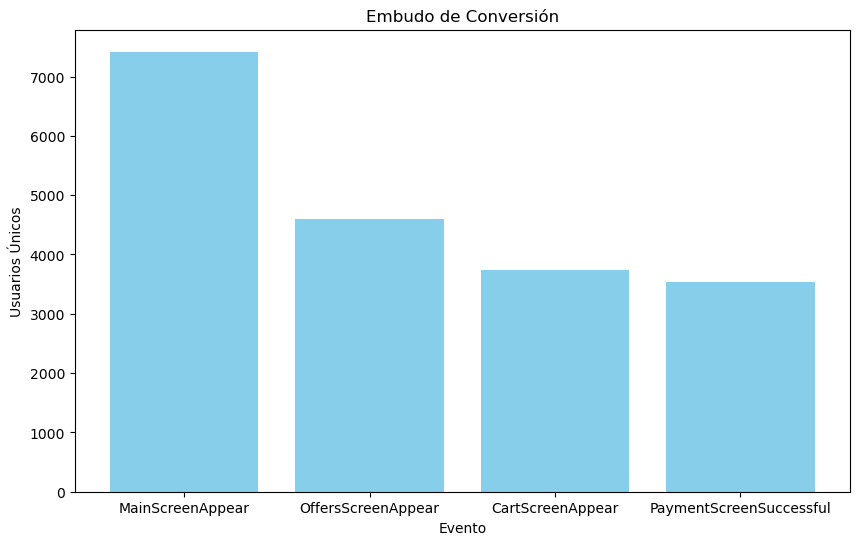

In [154]:
plt.figure(figsize=(10, 6))
plt.bar(usuarios_por_evento['evento'], usuarios_por_evento['usuarios_unicos'], color='skyblue')
plt.title('Embudo de Conversión')
plt.xlabel('Evento')
plt.ylabel('Usuarios Únicos')
plt.show()


#### ¿En qué etapa pierdes más usuarios?

In [155]:
# Paso 1: Calcular la caída de usuarios entre etapas
usuarios_por_evento['usuarios_perdidos'] = usuarios_por_evento['usuarios_unicos'].diff(-1).fillna(0).abs()

# Paso 2: Calcular el porcentaje de usuarios perdidos
usuarios_por_evento['porcentaje_perdido'] = (usuarios_por_evento['usuarios_perdidos'] / usuarios_por_evento['usuarios_unicos']) * 100

# Paso 3: Identificar la etapa con mayor pérdida
etapa_mayor_perdida = usuarios_por_evento.loc[usuarios_por_evento['usuarios_perdidos'].idxmax()]

# Mostrar los resultados
print(usuarios_por_evento)
print("\nEtapa con mayor pérdida de usuarios:")
print(etapa_mayor_perdida[['evento', 'usuarios_perdidos', 'porcentaje_perdido']])


                    evento  usuarios_unicos  proporcion  usuarios_perdidos  \
0         MainScreenAppear             7419         NaN             2826.0   
1       OffersScreenAppear             4593    0.619086              859.0   
2         CartScreenAppear             3734    0.812976              195.0   
3  PaymentScreenSuccessful             3539    0.947777                0.0   

   porcentaje_perdido  
0           38.091387  
1           18.702373  
2            5.222282  
3            0.000000  

Etapa con mayor pérdida de usuarios:
evento                MainScreenAppear
usuarios_perdidos               2826.0
porcentaje_perdido           38.091387
Name: 0, dtype: object


En la etapa que mas se pierden usuarios y no llegan a la siguiente etapa es desde la pantalla principal y el porcentaje de perdida es de 38.09% 

#### ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?

In [156]:
# Paso 1: Definir el primer evento y el evento final del embudo
primer_evento = 'MainScreenAppear'
evento_final = 'PaymentScreenSuccessful'

# Paso 2: Obtener la cantidad de usuarios únicos en el primer evento
usuarios_primer_evento = data_clean[data_clean['event'] == primer_evento]['user'].nunique()

# Paso 3: Obtener la cantidad de usuarios únicos que llegan al evento final
usuarios_evento_final = data[data['event'] == evento_final]['user'].nunique()

# Paso 4: Calcular el porcentaje de usuarios que completan el viaje
porcentaje_completan_viaje = (usuarios_evento_final / usuarios_primer_evento) * 100

# Mostrar resultados
print(f"Usuarios en el primer evento ({primer_evento}): {usuarios_primer_evento}")
print(f"Usuarios en el evento final ({evento_final}): {usuarios_evento_final}")
print(f"Porcentaje de usuarios que completan todo el viaje: {porcentaje_completan_viaje:.2f}%")


Usuarios en el primer evento (MainScreenAppear): 7419
Usuarios en el evento final (PaymentScreenSuccessful): 3547
Porcentaje de usuarios que completan todo el viaje: 47.81%


Solo el 47.81% llegan desde la paguina principal hasta hacer el pago de sus compras.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente análisis del embudo de conversión. Has identificado correctamente las etapas clave, las tasas de pérdida y el porcentaje de usuarios que completan el proceso. La visualización ayuda a interpretar los datos de manera clara. ¡Sigue así!  
</div>

## Paso 5. Estudiar los resultados del experimento

¿Cuántos usuarios hay en cada grupo?

In [157]:
# Paso 1: Contar usuarios únicos por grupo (columna exp_id)
usuarios_por_grupo = data_clean.groupby('exp_id')['user'].nunique().reset_index()

# Paso 2: Renombrar las columnas para mayor claridad
usuarios_por_grupo.columns = ['grupo', 'usuarios_unicos']

# Mostrar resultados
print(usuarios_por_grupo)


   grupo  usuarios_unicos
0    246             2484
1    247             2513
2    248             2537


Aqui vemos cuantos usuarios unicos hay en cada grupo

### Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

In [158]:
# Filtrar los datos por los grupos 246 y 247
grupo_246 = data_clean[data_clean['exp_id'] == 246]
grupo_247 = data_clean[data_clean['exp_id'] == 247]

# Contar el número de usuarios que realizaron el evento final en cada grupo
event_246 = grupo_246[grupo_246['event'] == 'PaymentScreenSuccessful']['user'].nunique()
event_247 = grupo_247[grupo_247['event'] == 'PaymentScreenSuccessful']['user'].nunique()

# Contar el total de usuarios únicos en cada grupo
total_246 = grupo_246['user'].nunique()
total_247 = grupo_247['user'].nunique()


In [159]:
# Calcular proporciones
exito246 = event_246 / total_246  # Proporción de éxitos en el grupo 246
exito247 = event_247 / total_247  # Proporción de éxitos en el grupo 247

# Mostrar resultados
print(f"Grupo 246: Éxitos = {event_246}, Total = {total_246}, Proporción = {exito246:.4f}")
print(f"Grupo 247: Éxitos = {event_247}, Total = {total_247}, Proporción = {exito247:.4f}")

Grupo 246: Éxitos = 1200, Total = 2484, Proporción = 0.4831
Grupo 247: Éxitos = 1158, Total = 2513, Proporción = 0.4608


In [160]:
# Paso 1: Calcular proporciones

p1 = exito246 / total_246
p2 = exito247 / total_247

# Paso 2: Proporción combinada
p_combined = (exito246 + exito247) / (total_246 + total_247)

# Paso 3: Diferencia entre proporciones
difference = p1 - p2

# Paso 4: Error estándar
SE = np.sqrt(p_combined * (1 - p_combined) * (1 / total_246 + 1 / total_247))

# Paso 5: Umbral de significancia
alpha = 0.05

# Paso 6: Estadístico Z
z_score = difference / SE

# Paso 7: p-valor (bilateral)
p_value = 2 * (1 - norm.cdf(abs(z_score)))

# Paso 8: Resultados
print(f"Diferencia entre proporciones: {difference:.4f}")
print(f"Estadístico Z: {z_score:.4f}")
print(f"P-valor: {p_value:.4f}")

# Paso 9: Conclusión
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Existe una diferencia estadísticamente significativa entre las muestras 246 y 247.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras 246 y 247 son significativamente diferentes.")


Diferencia entre proporciones: 0.0000
Estadístico Z: 0.0286
P-valor: 0.9772
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras 246 y 247 son significativamente diferentes.


### Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?

In [161]:
# Paso 1: Seleccionar el evento más popular
evento_mas_popular = data_clean.groupby('event')['user'].nunique().idxmax()
print(f"Evento más popular: {evento_mas_popular}")

Evento más popular: MainScreenAppear


In [162]:
# Paso 2: Crear una función para realizar la prueba
def prueba_diferencia_proporciones(data, evento, grupo_1, grupo_2, alpha=0.05):
    """
    Realiza la prueba de diferencia de proporciones entre dos grupos para un evento específico.
    """
    # Filtrar los datos por los grupos
    grupo_1_data = data[data['exp_id'] == grupo_1]
    grupo_2_data = data[data['exp_id'] == grupo_2]
    
    # Calcular éxitos y totales por grupo
    exito_1 = grupo_1_data[grupo_1_data['event'] == evento]['user'].nunique()
    exito_2 = grupo_2_data[grupo_2_data['event'] == evento]['user'].nunique()
    total_1 = grupo_1_data['user'].nunique()
    total_2 = grupo_2_data['user'].nunique()
    
    # Calcular proporciones
    p1 = exito_1 / total_1
    p2 = exito_2 / total_2
    
    # Proporción combinada
    p_combined = (exito_1 + exito_2) / (total_1 + total_2)
    
    # Error estándar
    SE = np.sqrt(p_combined * (1 - p_combined) * (1 / total_1 + 1 / total_2))
    
    # Estadístico Z
    z_score = (p1 - p2) / SE
    
    # p-valor (bilateral)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
    
    # Resultados
    print(f"\nEvento: {evento}")
    print(f"Grupo {grupo_1}: Éxitos = {exito_1}, Total = {total_1}, Proporción = {p1:.4f}")
    print(f"Grupo {grupo_2}: Éxitos = {exito_2}, Total = {total_2}, Proporción = {p2:.4f}")
    print(f"Diferencia entre proporciones: {p1 - p2:.4f}")
    print(f"Estadístico Z: {z_score:.4f}")
    print(f"P-valor: {p_value:.4f}")
    
    # Conclusión
    if p_value < alpha:
        print("Rechazamos la hipótesis nula: Existe una diferencia estadísticamente significativa entre los grupos.")
    else:
        print("No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que los grupos son significativamente diferentes.")



In [163]:
# Paso 3: Aplicar la prueba al evento más popular
prueba_diferencia_proporciones(data_clean, evento_mas_popular, 246, 247)



Evento: MainScreenAppear
Grupo 246: Éxitos = 2450, Total = 2484, Proporción = 0.9863
Grupo 247: Éxitos = 2476, Total = 2513, Proporción = 0.9853
Diferencia entre proporciones: 0.0010
Estadístico Z: 0.3093
P-valor: 0.7571
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que los grupos son significativamente diferentes.


In [164]:
# Paso 4: Repetir el procedimiento para todos los eventos
eventos_unicos = data_clean['event'].unique()
for evento in eventos_unicos:
    prueba_diferencia_proporciones(data_clean, evento, 246, 247)


Evento: Tutorial
Grupo 246: Éxitos = 278, Total = 2484, Proporción = 0.1119
Grupo 247: Éxitos = 283, Total = 2513, Proporción = 0.1126
Diferencia entre proporciones: -0.0007
Estadístico Z: -0.0782
P-valor: 0.9377
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que los grupos son significativamente diferentes.

Evento: MainScreenAppear
Grupo 246: Éxitos = 2450, Total = 2484, Proporción = 0.9863
Grupo 247: Éxitos = 2476, Total = 2513, Proporción = 0.9853
Diferencia entre proporciones: 0.0010
Estadístico Z: 0.3093
P-valor: 0.7571
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que los grupos son significativamente diferentes.

Evento: OffersScreenAppear
Grupo 246: Éxitos = 1542, Total = 2484, Proporción = 0.6208
Grupo 247: Éxitos = 1520, Total = 2513, Proporción = 0.6049
Diferencia entre proporciones: 0.0159
Estadístico Z: 1.1550
P-valor: 0.2481
No rechazamos la hipótesis nula: No hay suficiente evidencia estad

### Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?

In [165]:
# Crear un grupo combinado de control (246 + 247)
grupo_control_combinado = data_clean[data_clean['exp_id'].isin([246, 247])]

# Función extendida para comparar con varios grupos
def prueba_diferencia_proporciones_multiple(data, evento, grupo_1, grupo_2, nombre_grupo_1, nombre_grupo_2, alpha=0.05):
    """
    Realiza la prueba de diferencia de proporciones entre dos grupos para un evento específico.
    """
    # Filtrar los datos por los grupos
    if grupo_2 == "control_combinado":  # Manejo especial para el grupo combinado
        grupo_1_data = data[data['exp_id'] == grupo_1]
        grupo_2_data = grupo_control_combinado
    else:
        grupo_1_data = data[data['exp_id'] == grupo_1]
        grupo_2_data = data[data['exp_id'] == grupo_2]
    
    # Calcular éxitos y totales por grupo
    exito_1 = grupo_1_data[grupo_1_data['event'] == evento]['user'].nunique()
    exito_2 = grupo_2_data[grupo_2_data['event'] == evento]['user'].nunique()
    total_1 = grupo_1_data['user'].nunique()
    total_2 = grupo_2_data['user'].nunique()
    
    # Verificar que los totales no sean cero
    if total_1 == 0 or total_2 == 0:
        print(f"\nEvento: {evento}")
        print(f"No hay datos suficientes en {nombre_grupo_1} o {nombre_grupo_2}.")
        print(f"{nombre_grupo_1}: Total usuarios = {total_1}")
        print(f"{nombre_grupo_2}: Total usuarios = {total_2}")
        return  # Salir de la función para este evento
    
    # Calcular proporciones
    p1 = exito_1 / total_1
    p2 = exito_2 / total_2
    
    # Proporción combinada
    p_combined = (exito_1 + exito_2) / (total_1 + total_2)
    
    # Error estándar
    SE = np.sqrt(p_combined * (1 - p_combined) * (1 / total_1 + 1 / total_2))
    
    # Estadístico Z
    z_score = (p1 - p2) / SE
    
    # p-valor (bilateral)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
    
    # Resultados
    print(f"\nComparación: {nombre_grupo_1} vs {nombre_grupo_2}")
    print(f"Evento: {evento}")
    print(f"{nombre_grupo_1}: Éxitos = {exito_1}, Total = {total_1}, Proporción = {p1:.4f}")
    print(f"{nombre_grupo_2}: Éxitos = {exito_2}, Total = {total_2}, Proporción = {p2:.4f}")
    print(f"Diferencia entre proporciones: {p1 - p2:.4f}")
    print(f"Estadístico Z: {z_score:.4f}")
    print(f"P-valor: {p_value:.4f}")
    
    # Conclusión
    if p_value < alpha:
        print("Rechazamos la hipótesis nula: Existe una diferencia estadísticamente significativa.")
    else:
        print("No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que hay diferencias significativas.")

# Iterar por cada evento y comparar los grupos
eventos_unicos = data_clean['event'].unique()

print("\n--- Comparaciones para el grupo con fuentes alteradas (248) ---")
for evento in eventos_unicos:
    # Comparar 248 vs 246
    prueba_diferencia_proporciones_multiple(data_clean, evento, 248, 246, "Grupo 248", "Grupo 246")
    # Comparar 248 vs 247
    prueba_diferencia_proporciones_multiple(data_clean, evento, 248, 247, "Grupo 248", "Grupo 247")
    # Comparar 248 vs grupo combinado (246 + 247)
    prueba_diferencia_proporciones_multiple(data_clean, evento, 248, "control_combinado", "Grupo 248", "Control Combinado", alpha=0.05)



--- Comparaciones para el grupo con fuentes alteradas (248) ---

Comparación: Grupo 248 vs Grupo 246
Evento: Tutorial
Grupo 248: Éxitos = 279, Total = 2537, Proporción = 0.1100
Grupo 246: Éxitos = 278, Total = 2484, Proporción = 0.1119
Diferencia entre proporciones: -0.0019
Estadístico Z: -0.2193
P-valor: 0.8264
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que hay diferencias significativas.

Comparación: Grupo 248 vs Grupo 247
Evento: Tutorial
Grupo 248: Éxitos = 279, Total = 2537, Proporción = 0.1100
Grupo 247: Éxitos = 283, Total = 2513, Proporción = 0.1126
Diferencia entre proporciones: -0.0026
Estadístico Z: -0.2985
P-valor: 0.7653
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que hay diferencias significativas.

Comparación: Grupo 248 vs Control Combinado
Evento: Tutorial
Grupo 248: Éxitos = 279, Total = 2537, Proporción = 0.1100
Control Combinado: Éxitos = 561, Total = 4997, Proporción = 0.1123
D

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen trabajo en la comparación estadística de los grupos experimentales. Has aplicado correctamente pruebas de diferencia de proporciones y evaluado la validez del experimento. La organización del código y el uso de funciones hacen que el análisis sea eficiente y reproducible. ¡Sigue así!  
</div>

### ¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

1. Nivel de significancia establecido

En todas las pruebas de hipótesis, el nivel de significancia α (alfa) utilizado fue 0.05 (5%).
Esto significa que hay un 5% de probabilidad de cometer un error tipo I (rechazar la hipótesis nula cuando es verdadera).

2. Cantidad de pruebas de hipótesis realizadas

Se realizaron 15 pruebas de hipótesis con comparación de proporciones entre grupos. Estas incluyen:

Comparaciones entre Grupo 246 y Grupo 247.
Comparaciones entre Grupo 248 y los grupos de control (246 y 247).
Comparaciones entre Grupo 248 y el grupo combinado de control (246 + 247).
Cada prueba se hizo para los siguientes eventos:

MainScreenAppear
OffersScreenAppear
CartScreenAppear
PaymentScreenSuccessful
Tutorial
Dado que cada comparación se hizo entre distintos grupos, el número total de pruebas es:

3 (comparaciones) × 5 (eventos) = 15 pruebas


3. Interpretación del nivel de significancia y falsos positivos

Con un nivel de significancia de 0.1 (10%), se esperaría que 1 de cada 10 pruebas arroje un falso positivo.
Si mantenemos 15 pruebas, podríamos esperar alrededor de 1.5 pruebas con falsos positivos en promedio.

El nivel de significancia óptimo depende del riesgo que estemos dispuestos a aceptar. Si queremos minimizar los falsos positivos, podríamos reducir  α(alfa) a 0.01 (1%), pero esto también aumenta el riesgo de error tipo II (no detectar una diferencia real cuando sí existe).

4. ¿Cuál debería ser el nivel de significancia?

Dado que el análisis no se encontró diferencias significativas en las pruebas ( p>0.05  en todos los casos), cambiar el nivel de significancia no afectará las conclusiones.
Si queremos asegurarnos de que las diferencias sean realmente significativas, podemos reducir α a 0.01 (1%), pero en este caso, ya que no hubo diferencias estadísticamente significativas con 

α = 0.05 tampoco las habría con  α=0.01.


5. Conclusiones del análisis

No se encontraron diferencias estadísticamente significativas entre los grupos (p-valor > 0.05 en todas las pruebas).

El evento con mayor pérdida de usuarios es "MainScreenAppear", con un 38% de abandono.

El 47.81% de los usuarios completan el embudo de compra hasta el pago.
Las muestras de los grupos 246 y 247 parecen haber sido bien divididas, ya que no se encontraron diferencias significativas.

El grupo 248 (con fuentes alteradas) tampoco mostró diferencias significativas respecto a los grupos de control.



Recomendaciones
Si deseas ser más estricto, usa 
α=0.01

pero los resultados seguirán sin diferencias significativas.
Para mejorar la conversión, enfócate en reducir la pérdida en la pantalla principal (MainScreenAppear).

Considera realizar nuevas pruebas A/B con cambios más significativos para ver si hay efectos reales en la conversión.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente análisis de nivel de significancia y pruebas de hipótesis. La explicación es clara y bien estructurada, mostrando un buen entendimiento de los errores tipo I y II. También es acertada la recomendación sobre ajustar el nivel de significancia según el contexto del análisis. ¡Sigue así!  
</div>


# Comentario general del revisor 

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a>  
    
¡Felicidades Elpidio! 🎉 Tu proyecto está **aprobado**. Has realizado un análisis sólido con una estructura clara, un manejo adecuado de los datos y un enfoque riguroso en las pruebas de hipótesis.  

 Puntos Positivos:  
- **Limpieza y exploración de datos:** Se observa un buen tratamiento de datos, asegurando su calidad antes del análisis.  
- **Visualización clara:** Gráficos bien diseñados que ayudan a interpretar los resultados.  
- **Uso correcto de pruebas estadísticas:** La metodología aplicada en el test A/B es adecuada y bien fundamentada.  
- **Conclusiones bien estructuradas:** Presentas una interpretación clara de los resultados y propuestas de mejora bien justificadas.  

Áreas para seguir mejorando:  
- **Optimización del código:** Puedes mejorar la eficiencia en algunas partes, eliminando pasos innecesarios o utilizando funciones más compactas.  
- **Exploración de variables adicionales:** Profundizar en otros factores que puedan estar afectando la conversión ayudaría a enriquecer el análisis.  
- **Pruebas A/B con cambios más significativos:** Considerar experimentos con modificaciones más impactantes para detectar diferencias claras en la conversión.  

 ¡Vas por un excelente camino! 🚀👏  
</div>